# Plot results

## Details by loss parameters

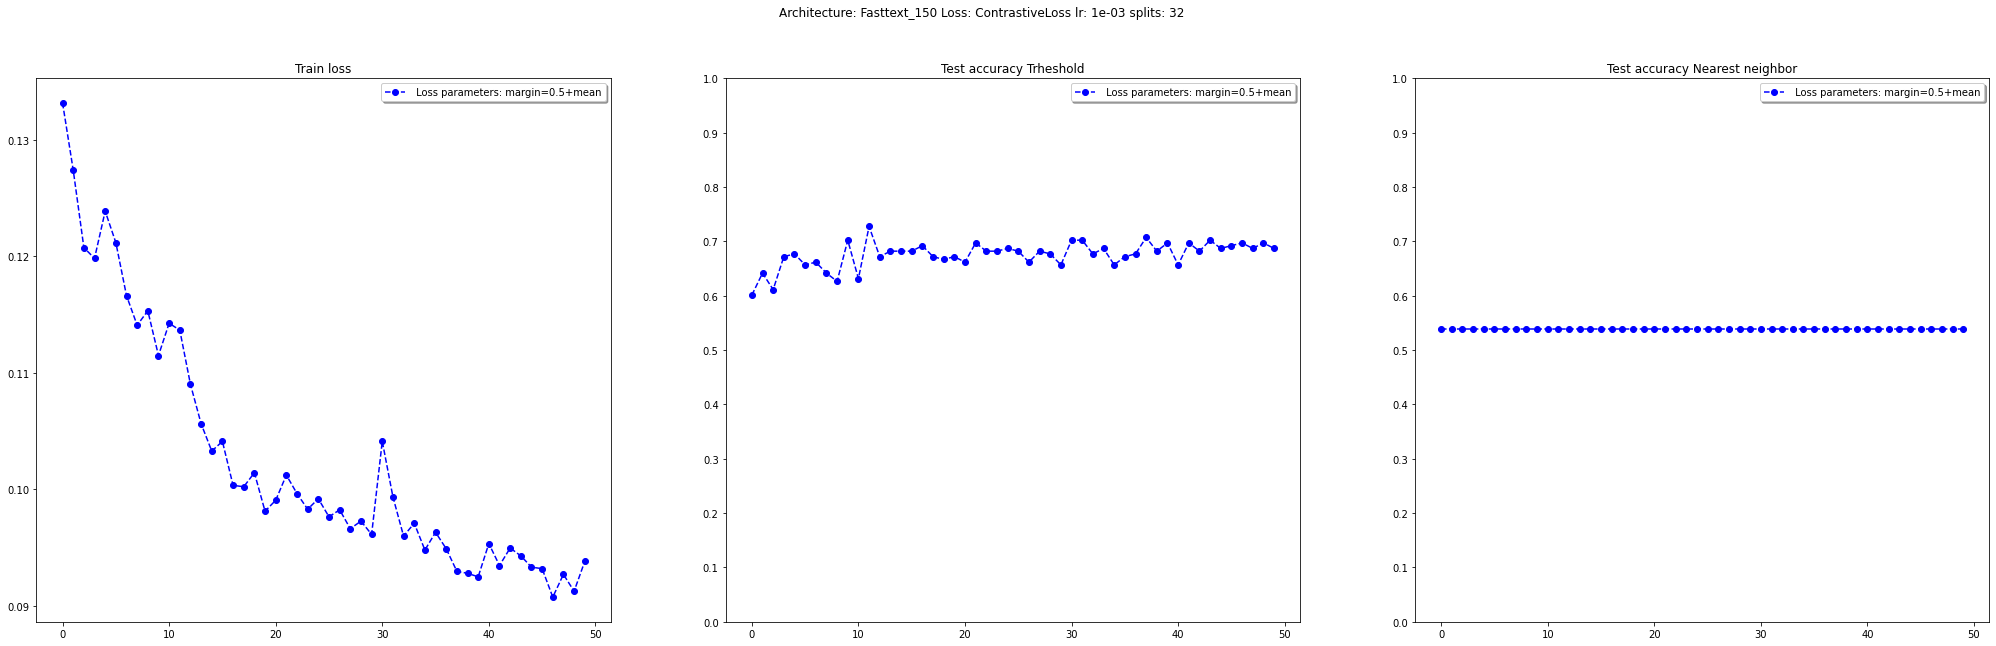

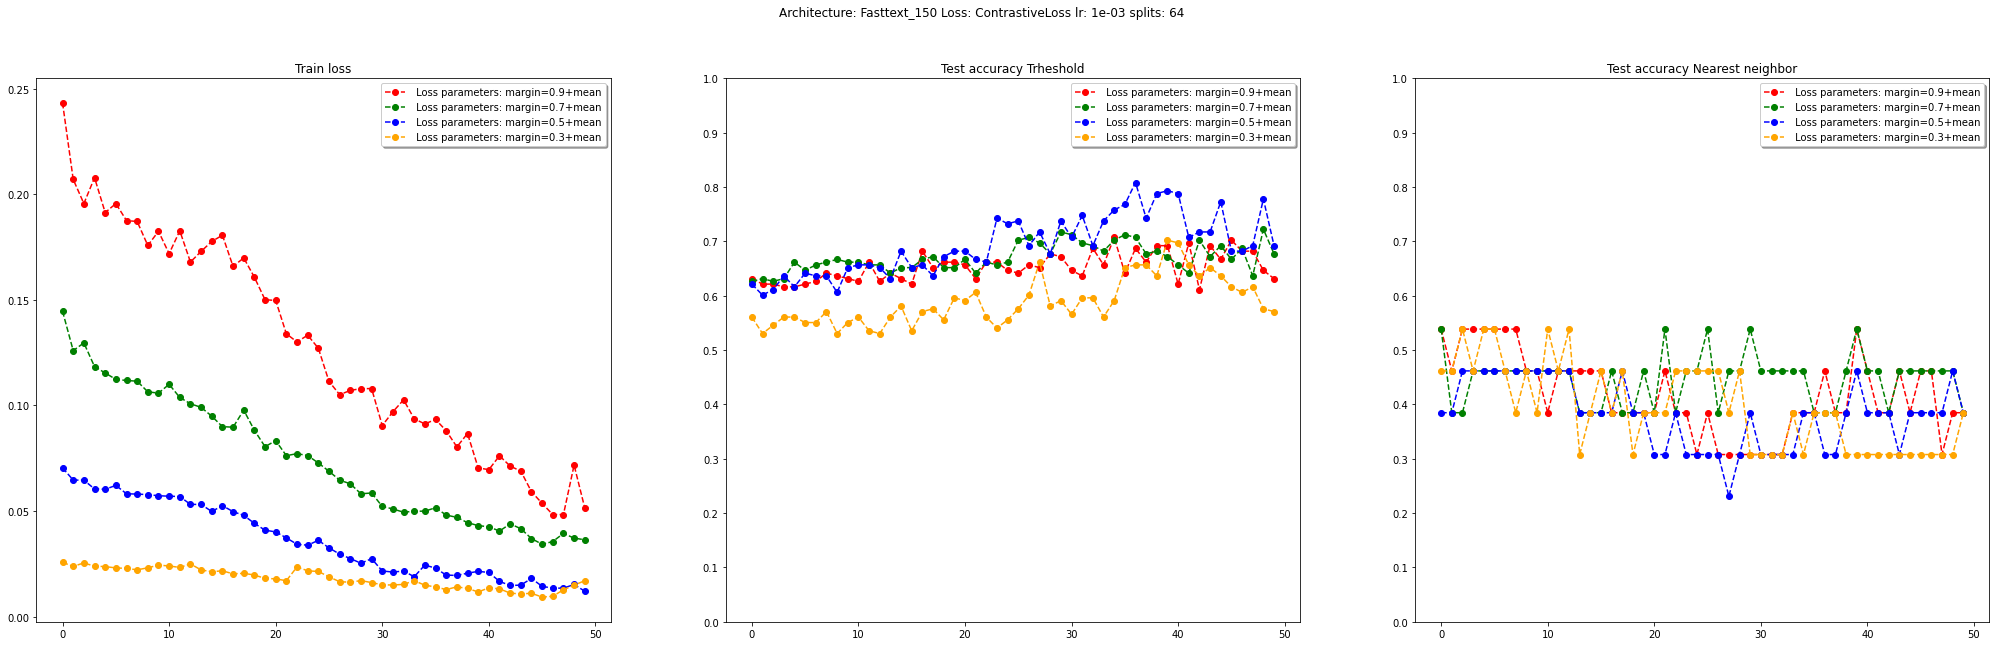

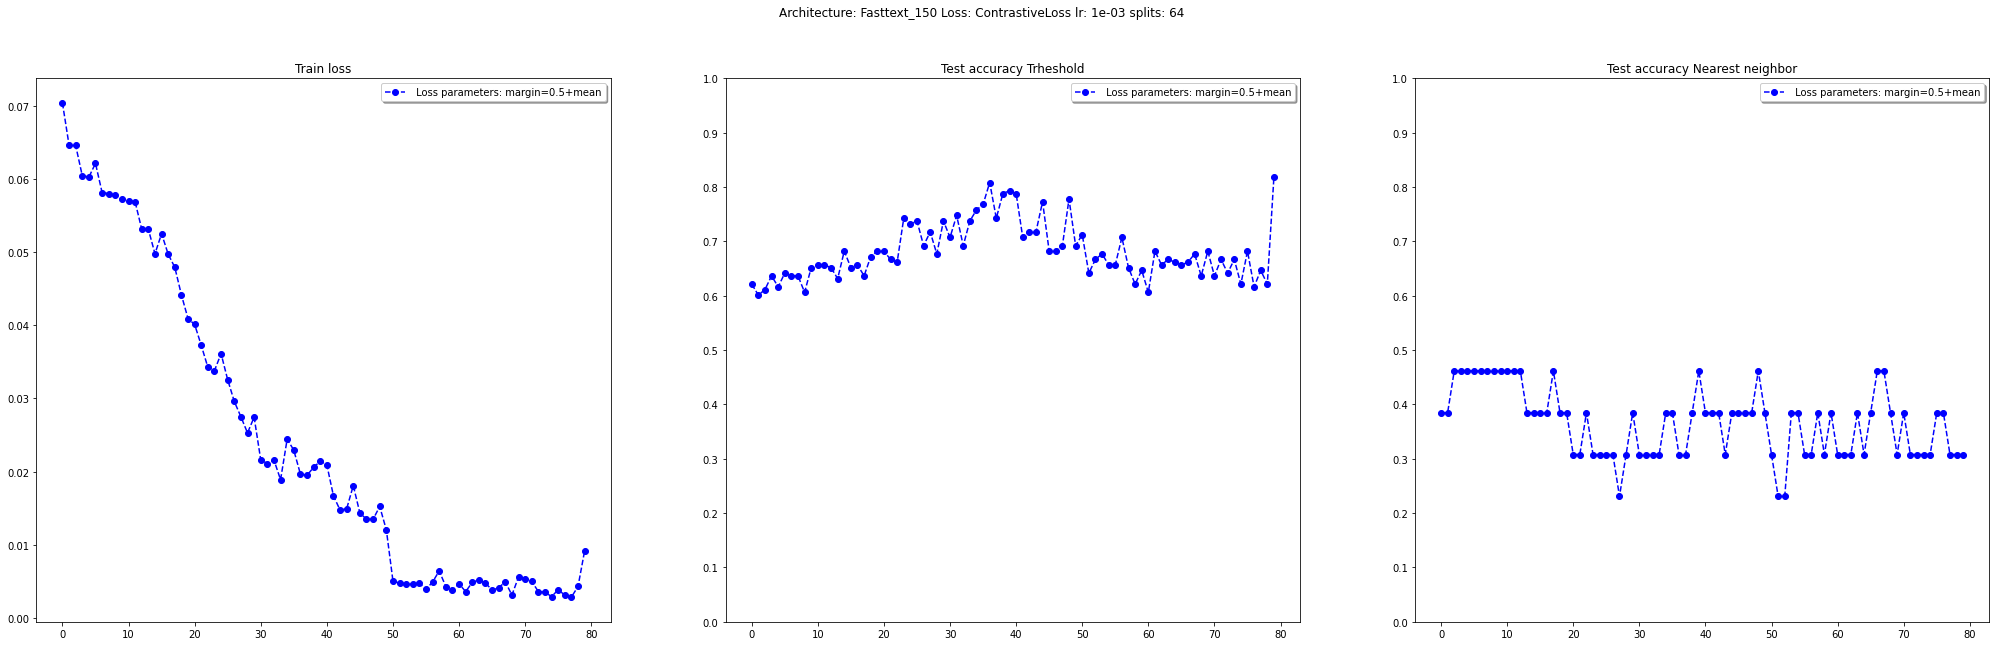

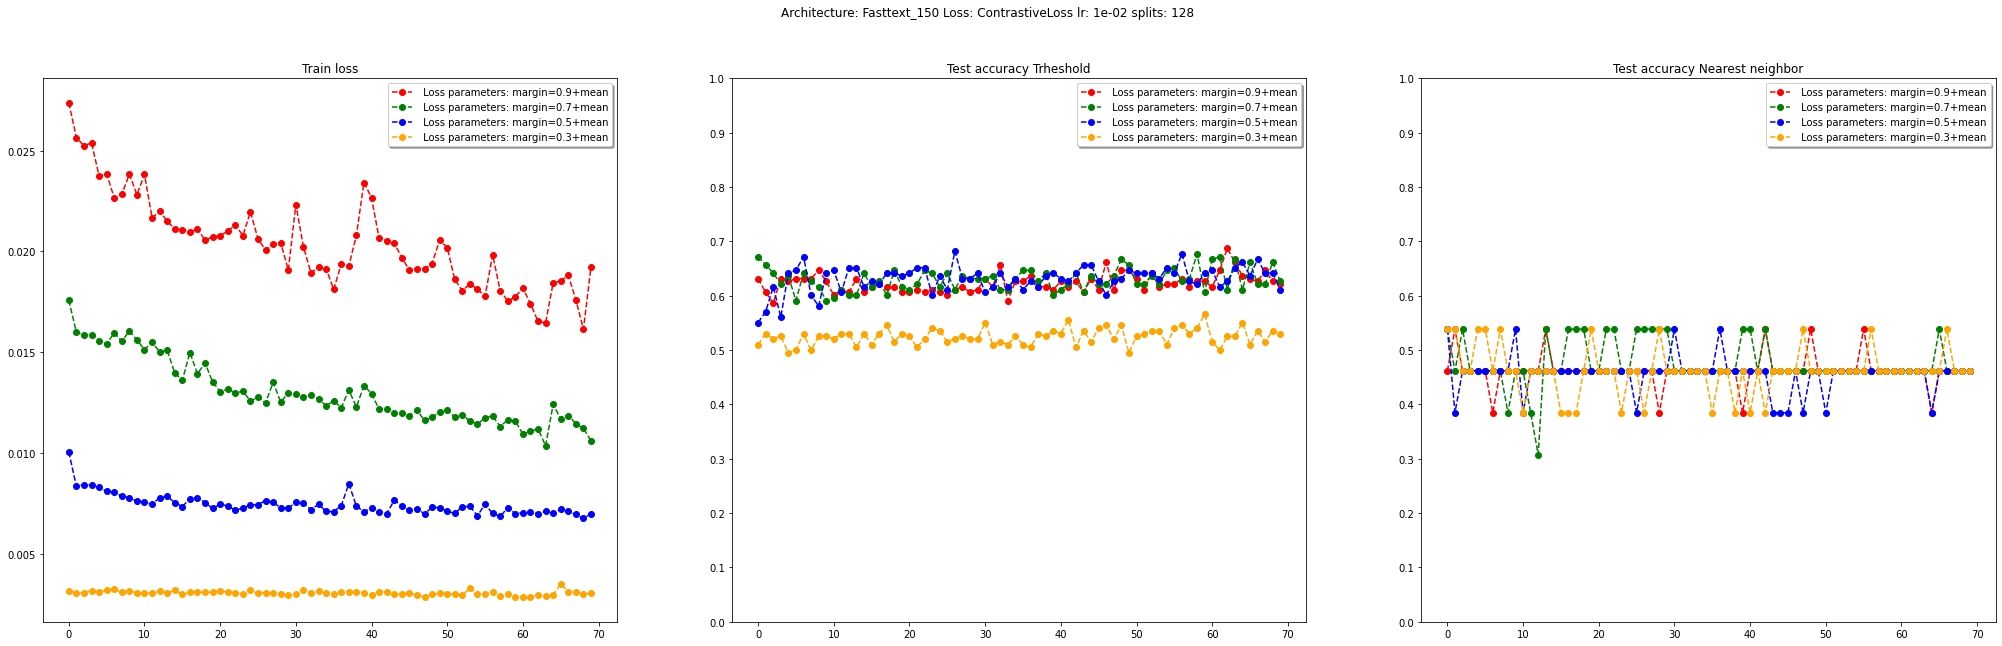

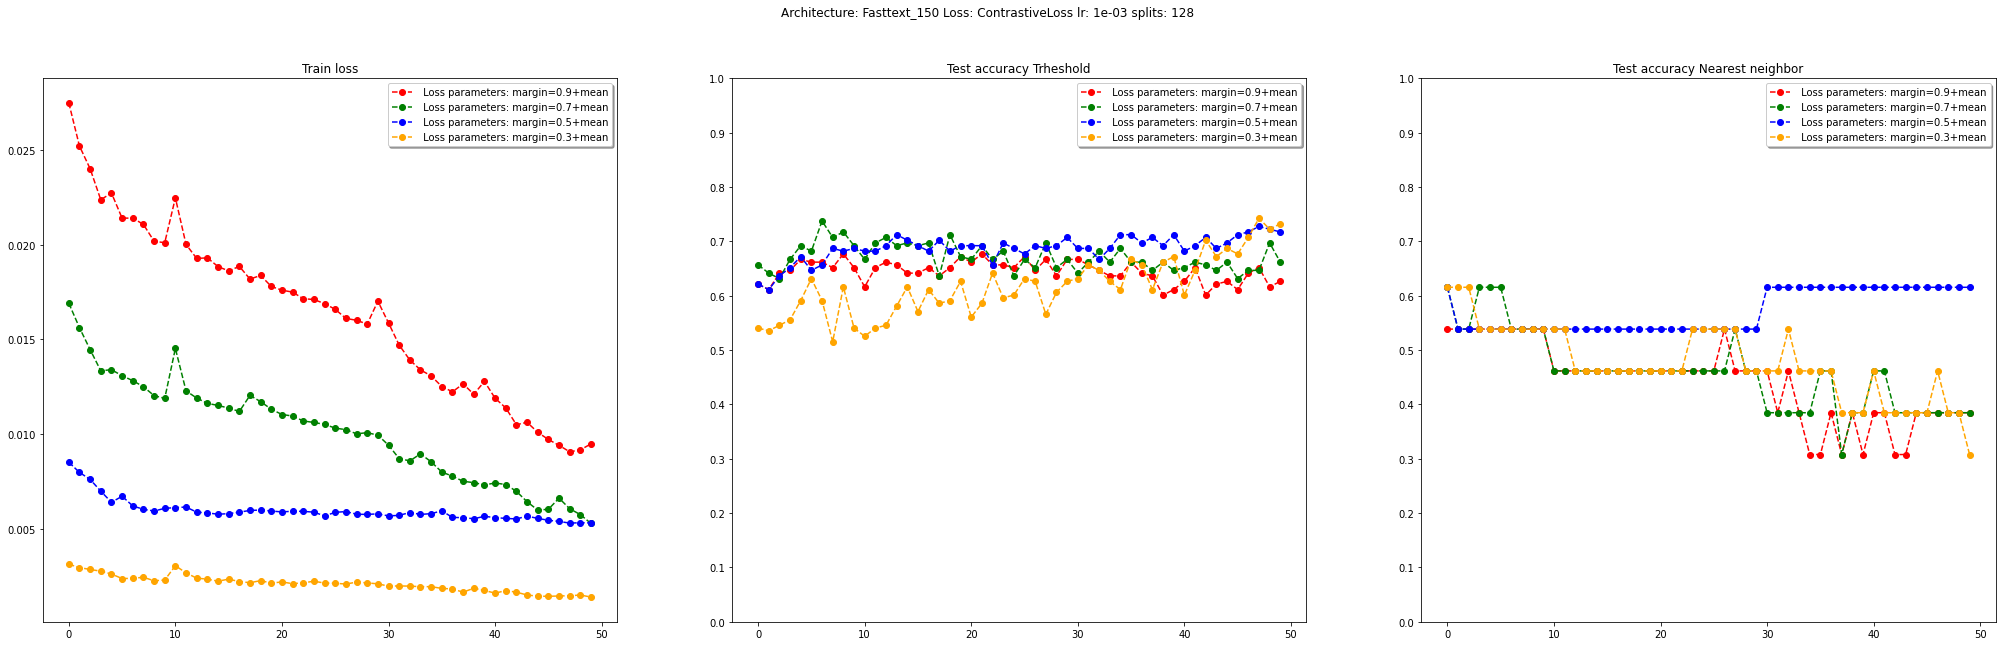

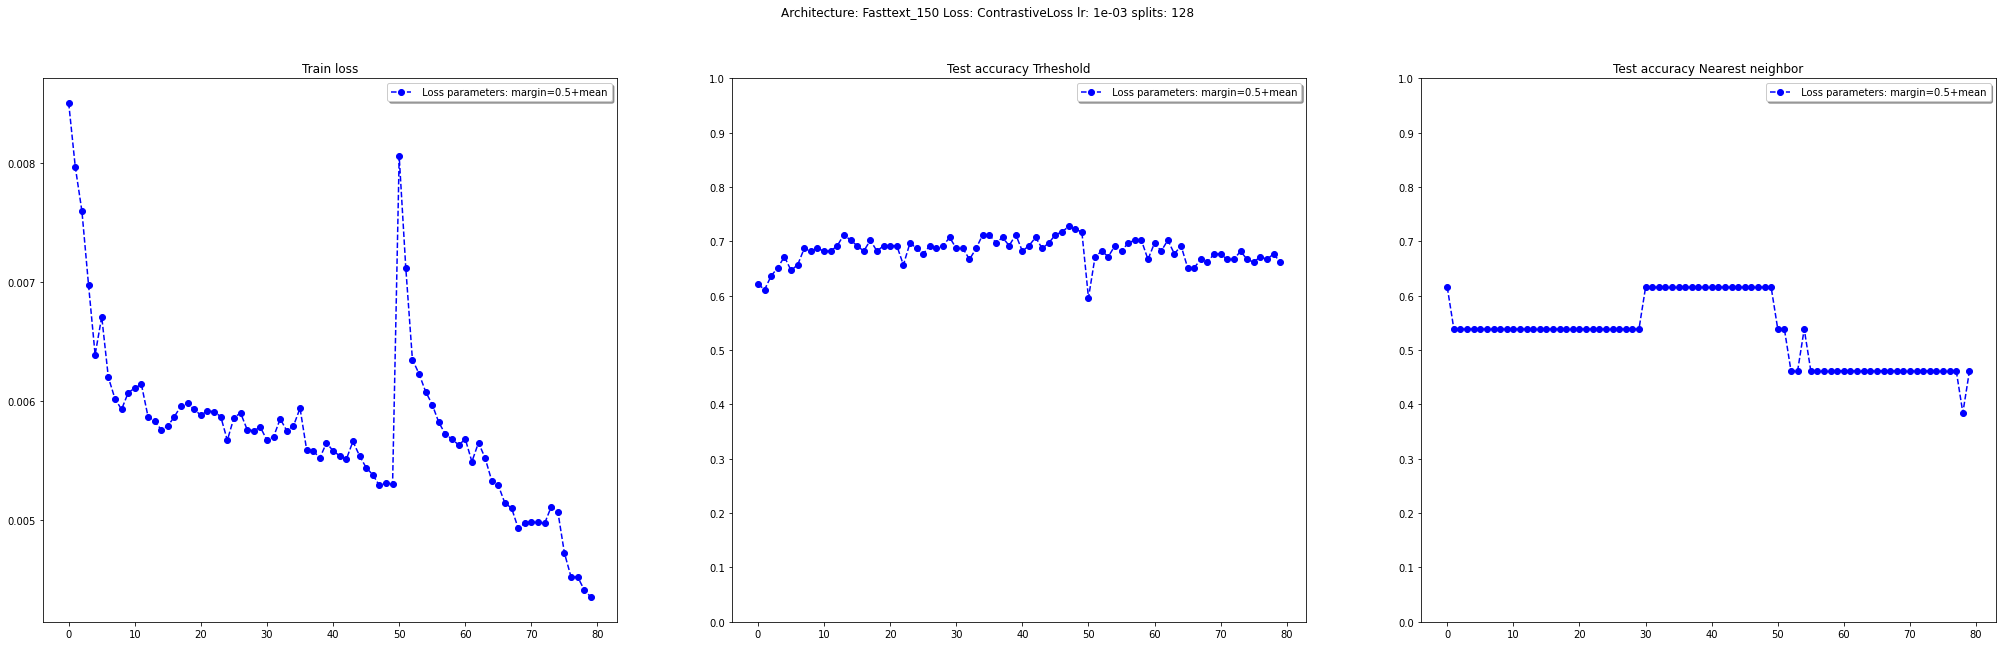

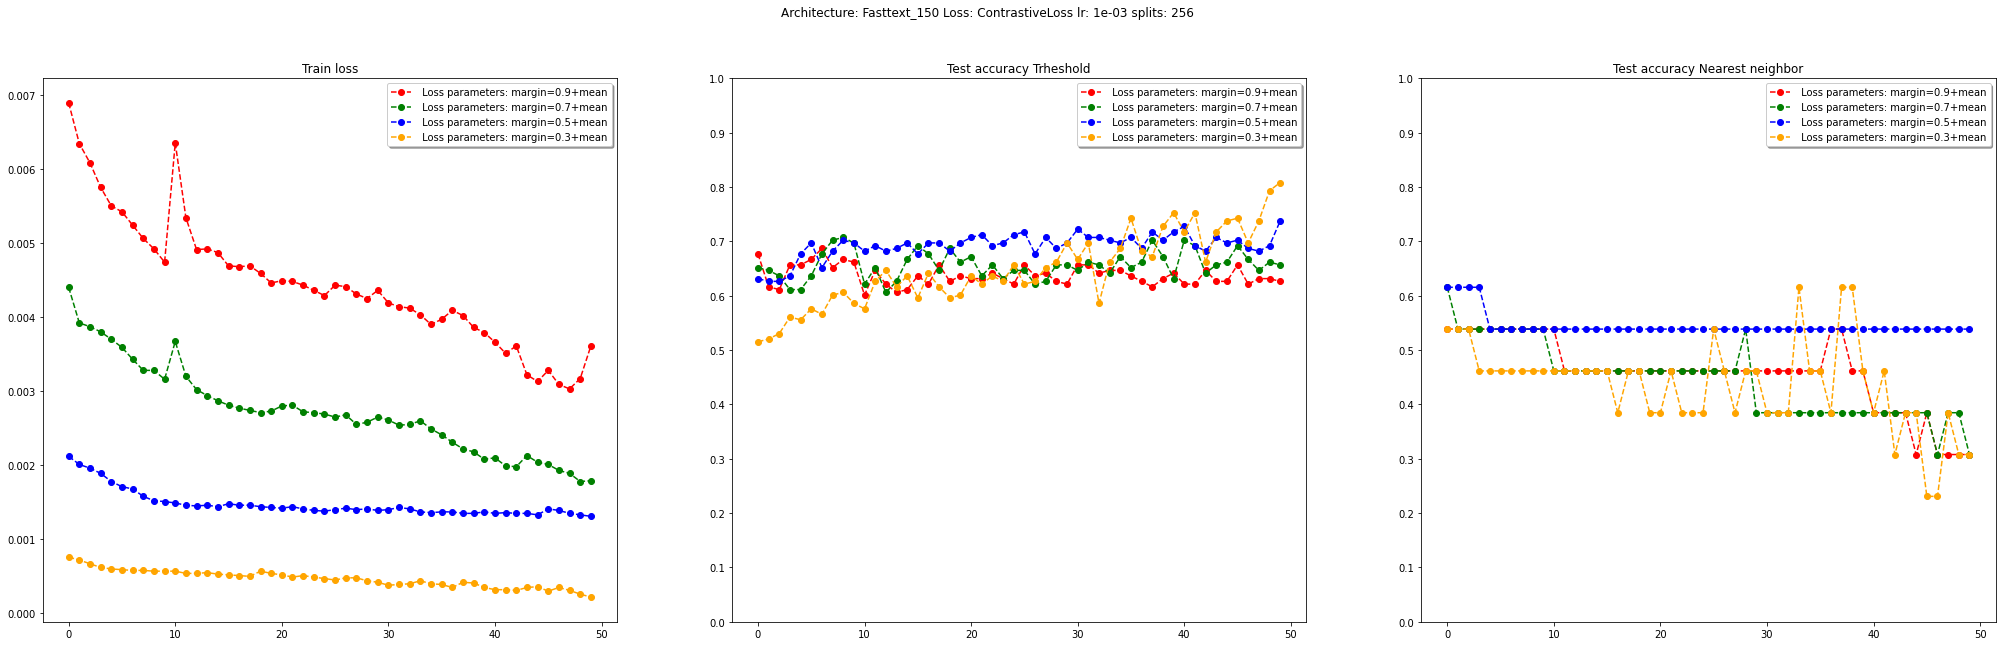

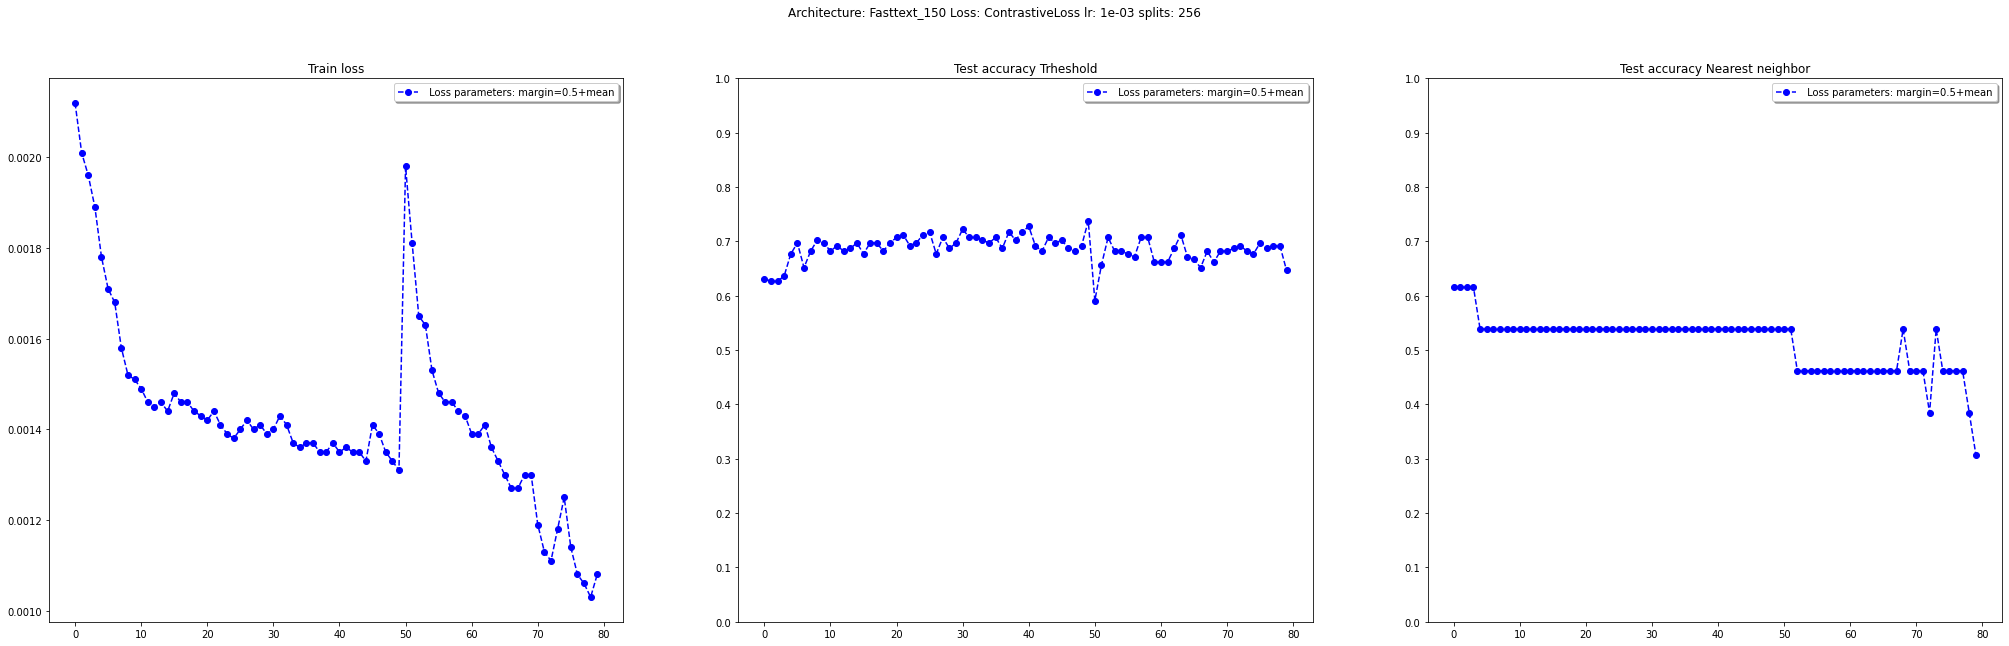

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def reading(file_path):
    s = open(file_path, 'r').read()
    return eval(s)

#parameters
# loss_functions = ["CosineEmbeddingLoss","ContrastiveLoss"]
# loss_parameters = ["0.1+mean","0.3+mean","0.5+mean","0.7+mean","0.9+mean"]
# colors = ["red","green","blue","orange","black"]
# learning_rates = ["0.0010","0.0007","0.0100"]
# splits = ["128","64","32"]
# archi = ["Bert_300","Bert_768","Fasttext3GCN_300","Fasttext_300","Fasttext_150"]
# ep_run_init = ["00","40","50","60","70"]
# ep_run_end = ["40","50","60","70","80","90","100"]


colors = ["red","green","blue","orange","black"]
loss_parameters = ["0.9+mean","0.7+mean","0.5+mean","0.3+mean","0.1+mean"]
learning_rates = [0.0007,0.0100,0.0010]
splits = ["32","64","128","256","512"]
ep_run_init = ["00","50"]
ep_run_end = ["50","60","70","80"]

#split_setup
db_name = ["openml_203ds_datasets_matching"]
strategy = ["isolation","random"]
archi = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"]
optimizer = ["adam","sgd"]
loss_functions = ["ContrastiveLoss","CosineEmbeddingLoss"]



##selection
sampling = 2
db = db_name[0]
st = strategy[0]
a = archi[0]
op = optimizer[0]
lf = loss_functions[0]

path = str("./results/{}/{}/{}/test_05_09/net_name:{}/optimizer_name:{}/loss_name:{}/".format(db,st,sampling,a,op,lf))

for s in splits:
    for lr in learning_rates:
        for eri in ep_run_init:
            for ere in ep_run_end:
                content = False
                for lp in range(len(loss_parameters)):                    
                    file_name = str("loss_parameters:{}|batch_splits:{}|lr:{:.0e}|epochs_run:{}_{}".format(loss_parameters[lp],s,lr,eri,ere))
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
#                         print(path+file_name+".txt")
                        continue
                    content = True
                    break

                if not content:
                    continue

                fig1, axs = plt.subplots(1, 3, figsize=(35, 10), facecolor='w', edgecolor='k')
                for lp in range(len(loss_parameters)):                    
                    file_name = str("loss_parameters:{}|batch_splits:{}|lr:{:.0e}|epochs_run:{}_{}".format(loss_parameters[lp],s,lr,eri,ere))
                    #{'epoch': 0, 'loss': 0.07563, 'acc': 0.54412, 'acc2': 0.36527, 'time_epoch': 268.2493, 'time_total': 268.2493}    
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
                        continue
                    loss = list(x["loss"] for x in df_results0)
                    acc = list(x["acc"] for x in df_results0)
                    acc2 = list(x["acc2"] for x in df_results0)

                    fig1.suptitle(str("Architecture: {} Loss: {} lr: {:.0e} splits: {}").format(a,lf,lr,s))
                    axs[1].set_ylim([0,1])
                    axs[2].set_ylim([0,1])
                    
                    axs[1].set_yticks(np.arange(0, 1.1, 0.1))
                    axs[2].set_yticks(np.arange(0, 1.1, 0.1))

                    axs[0].plot(range(0,len(df_results0)), loss, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])
                    axs[1].plot(range(0,len(df_results0)), acc, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])
                    axs[2].plot(range(0,len(df_results0)), acc2, marker="o", c=colors[lp],  linestyle='--', label=" Loss parameters: margin="+loss_parameters[lp])

                    axs[0].set_title("Train loss")
                    axs[1].set_title("Test accuracy Trheshold")
                    axs[2].set_title("Test accuracy Nearest neighbor")

                    leg = axs[0].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[1].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[2].legend(loc='best', ncol=1, shadow=True, fancybox=True)

                fig1.savefig(path+str("batch_splits:{}|lr:{:.0e}|epochs_run:{}_{}".format(s,lr,eri,ere))+".png",pad_inches = 0)

## Details by split

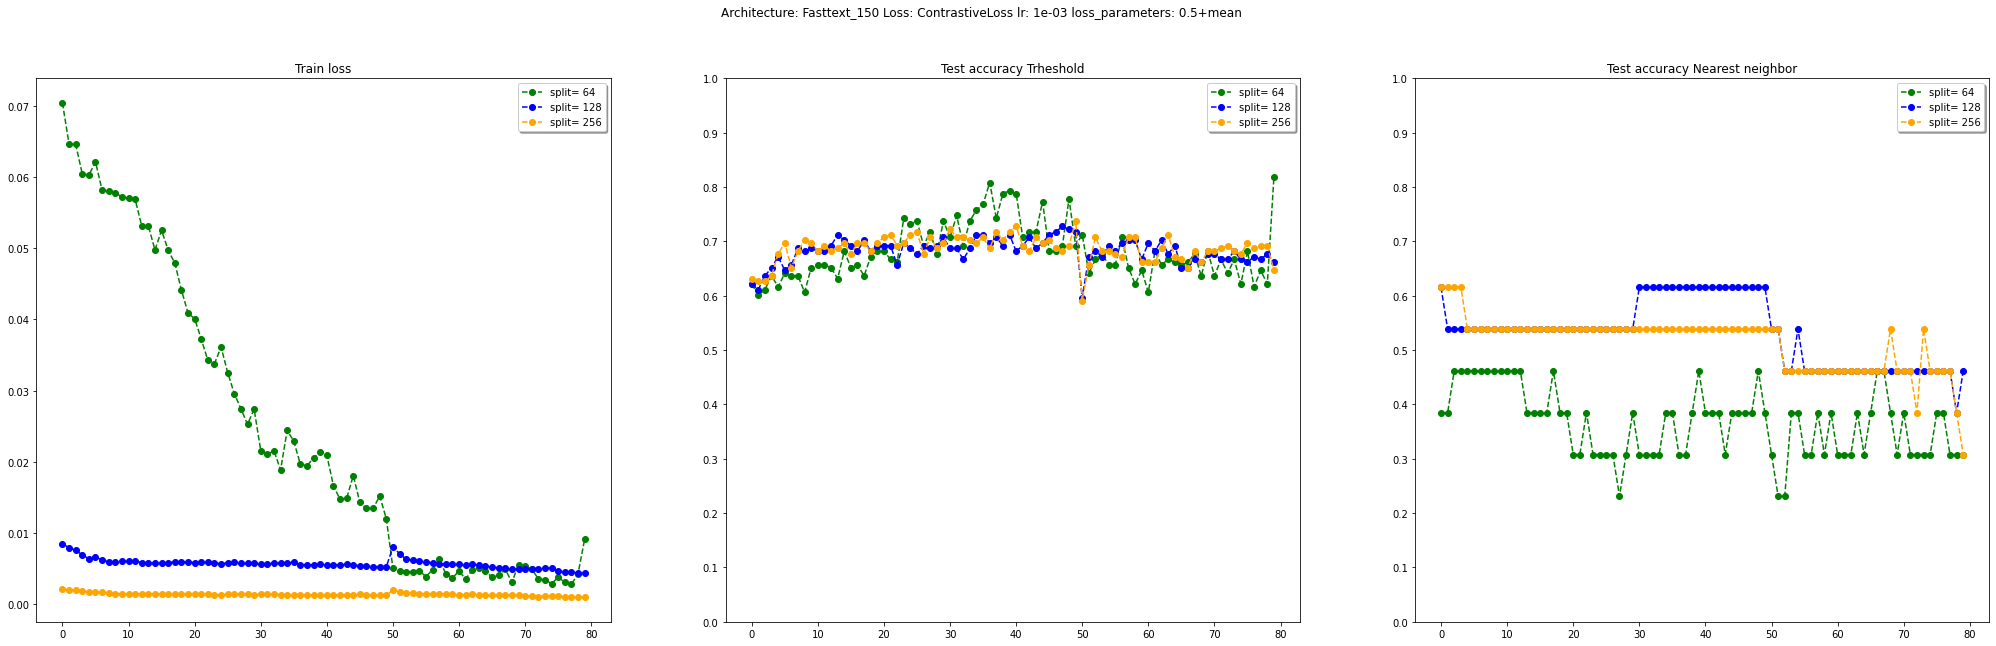

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def reading(file_path):
    s = open(file_path, 'r').read()
    return eval(s)

#parameters
# loss_functions = ["CosineEmbeddingLoss","ContrastiveLoss"]
# loss_parameters = ["0.1+mean","0.3+mean","0.5+mean","0.7+mean","0.9+mean"]
# colors = ["red","green","blue","orange","black"]
# learning_rates = ["0.0010","0.0007","0.0100"]
# splits = ["128","64","32"]
# archi = ["Bert_300","Bert_768","Fasttext3GCN_300","Fasttext_300","Fasttext_150"]
# ep_run_init = ["00","40","50","60","70"]
# ep_run_end = ["40","50","60","70","80","90","100"]


colors = ["red","green","blue","orange","black"]
loss_parameters = ["0.9+mean","0.7+mean","0.5+mean","0.3+mean","0.1+mean"]
learning_rates = [0.0007,0.0100,0.0010]
splits = ["32","64","128","256","512"]
ep_run_init = ["50"]
ep_run_end = ["50","60","80"]

#split_setup
db_name = ["openml_203ds_datasets_matching"]
strategy = ["isolation","random"]
archi = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"]
optimizer = ["adam","sgd"]
loss_functions = ["ContrastiveLoss","CosineEmbeddingLoss"]



##selection
sampling = 2
db = db_name[0]
st = strategy[0]
a = archi[0]
op = optimizer[0]
lf = loss_functions[0]

path = str("./results/{}/{}/{}/test_05_09/net_name:{}/optimizer_name:{}/loss_name:{}/".format(db,st,sampling,a,op,lf))

for lp in range(len(loss_parameters)):                    
    for lr in learning_rates:
        for eri in ep_run_init:
            for ere in ep_run_end:
                content = False
                for s in range(len(splits)):
                    file_name = str("loss_parameters:{}|batch_splits:{}|lr:{:.0e}|epochs_run:{}_{}".format(loss_parameters[lp],splits[s],lr,eri,ere))
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
#                         print(path+file_name+".txt")
                        continue
                    content = True
                    break

                if not content:
                    continue

                fig1, axs = plt.subplots(1, 3, figsize=(35, 10), facecolor='w', edgecolor='k')
                for s in range(len(splits)):
                    file_name = str("loss_parameters:{}|batch_splits:{}|lr:{:.0e}|epochs_run:{}_{}".format(loss_parameters[lp],splits[s],lr,eri,ere))
                    #{'epoch': 0, 'loss': 0.07563, 'acc': 0.54412, 'acc2': 0.36527, 'time_epoch': 268.2493, 'time_total': 268.2493}    
                    try:
                        df_results0 = reading(path+file_name+".txt")
                    except:
                        continue
                    loss = list(x["loss"] for x in df_results0)
                    acc = list(x["acc"] for x in df_results0)
                    acc2 = list(x["acc2"] for x in df_results0)

                    fig1.suptitle(str("Architecture: {} Loss: {} lr: {:.0e} loss_parameters: {}").format(a,lf,lr,loss_parameters[lp]))
                    axs[1].set_ylim([0,1])
                    axs[2].set_ylim([0,1])
                    axs[1].set_yticks(np.arange(0, 1.1, 0.1))
                    axs[2].set_yticks(np.arange(0, 1.1, 0.1))

                    axs[0].plot(range(0,len(df_results0)), loss, marker="o", c=colors[s],  linestyle='--', label="split= "+splits[s])
                    axs[1].plot(range(0,len(df_results0)), acc, marker="o", c=colors[s],  linestyle='--', label="split= "+splits[s])
                    axs[2].plot(range(0,len(df_results0)), acc2, marker="o", c=colors[s],  linestyle='--', label="split= "+splits[s])

                    axs[0].set_title("Train loss")
                    axs[1].set_title("Test accuracy Trheshold")
                    axs[2].set_title("Test accuracy Nearest neighbor")

                    leg = axs[0].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[1].legend(loc='best', ncol=1, shadow=True, fancybox=True)
                    leg = axs[2].legend(loc='best', ncol=1, shadow=True, fancybox=True)

                fig1.savefig(path+str("loss_parameters:{}|lr:{:.0e}|epochs_run:{}_{}".format(loss_parameters[lp],lr,eri,ere))+".png",pad_inches = 0)